In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import translators as ts
from nltk.translate.bleu_score import sentence_bleu
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /home/noah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/noah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/noah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Using United States server backend.


In [2]:
# train = open("train.txt")
# test = open("test.txt")


def getData(file):
    fileSrc = open(file)
    dataset = []
    item = {}
    for index, i in enumerate(fileSrc):
        if(index%6 == 0):
            item['source'] = i.replace("\n", "")
        elif(index%6==1):
            item['ref'] = i.replace("\n", "")
        elif(index%6 ==2):
            item['cand'] = i.replace("\n", "")
        elif(index%6 ==3):
            item['qual'] = i.replace("\n", "")
        elif(index%6 ==4):
            if i.replace("\n", "") == 'H':
                item['target'] = 1
            else:
                item['target'] = 0
        elif(index%6 ==5):
            dataset.append(item)            
            item['data'] = item['source'] + ' ' + item['cand']
            item = {}
    return dataset

train = getData("train.txt")
pdTrain = pd.DataFrame.from_records(train)

test = getData("test.txt")
pdTest = pd.DataFrame.from_records(test)




In [215]:
# from matplotlib import pyplot as plt

# # CandSize = [len(x['cand']) for x in train if x['target'] != 1]
bleuScores = np.array([sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0, 1, 0, 0) ) for x in test])
print(bleuScores)
for index, i in enumerate(test):
#     test[index]['2gramQual'] = bleuScores[index]
    
# x = trainPD.iloc[583]

# trainPD.at[583, '2gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.5, 0.5, 0, 0) )
# trainPD.at[583, '3gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.33, 0.33, 0.33, 0) )
# trainPD.at[583, '4gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.25, 0.25, 0.25, 0.25) )
    
# print(trainPD.iloc[583])

# x = testPD.iloc[173]

# testPD.at[173, '2gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.5, 0.5, 0, 0) )
# testPD.at[173, '3gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.33, 0.33, 0.33, 0) )
# testPD.at[173, '4gramBleu'] = sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.25, 0.25, 0.25, 0.25) )
    
# print(testPD.iloc[173])

[2.49694208e-001 4.78446192e-001 2.92682927e-001 2.15792789e-001
 4.90920913e-001 9.10346831e-002 3.11111111e-001 1.19013079e-001
 3.23127313e-001 2.00000000e-001 1.80000000e-001 2.07360664e-001
 3.22920763e-001 2.61855031e-002 1.10352290e-001 4.00000000e-001
 1.96368365e-001 2.34896030e-001 5.76889469e-002 1.02849273e-001
 9.18341897e-002 1.27735679e-001 3.52941176e-001 4.21052632e-001
 1.37457856e-001 3.17102939e-001 2.32558140e-001 2.50024341e-001
 5.26315789e-002 3.33333333e-001 4.08810520e-002 6.62157855e-002
 3.91304348e-001 2.65183611e-001 2.50000000e-001 4.16666667e-001
 4.88372093e-001 2.45047160e-001 2.03389831e-001 4.37500000e-001
 5.01842408e-001 3.90243902e-001 1.59584315e-001 2.58201781e-001
 3.17714222e-001 3.41463415e-001 3.51851852e-001 4.55259126e-001
 4.61538462e-001 3.41730783e-001 3.80000000e-001 7.64705882e-001
 4.28701960e-001 1.81818182e-001 7.23832435e-002 2.00000000e-001
 3.52941176e-001 5.15151515e-001 7.14503266e-002 2.72727273e-001
 2.14350980e-001 1.532797

In [52]:

humanScores = 0
humanCount = 0
mScores =0
mCount= 0
for i in test:
    if i['target'] == 1:
        humanScores += float(i['4gramQual'])
        humanCount+=1
    else:
        mScores += float(i['4gramQual'])
        mCount+=1
        
print(humanCount)
print(mCount)
print(humanScores/humanCount)
print(mScores/mCount)

91
82
0.2343146432682303
0.08120836764168485


In [57]:
print(train[0])
# print(len(traizxn))

# trainPD = pd.read_csv("trainWithAllBackTrans.csv")
# testPD = pd.read_csv("testWithAllBackTrans.csv")

# print(trainPD.iloc[0])
for index, i in enumerate(test):
#     trainPD.at[index, '1gramBleu'] = train[index]['1gramQual']
    testPD.at[index, '2gramBleu'] = i['2gramQual']
    testPD.at[index, '3gramBleu'] = i['3gramQual']
    testPD.at[index, '4gramBleu'] = i['4gramQual']
    
print(testPD.iloc[0])


{'source': '巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂', 'ref': 'bahraini princess marries us soldier , astonishing 5 year bond comes to end', 'cand': 'bahraini princess marries a u.s. soldier ; astounding marriage dissolves in 5 years', 'qual': '0.3125', 'target': 1, 'data': '巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂 bahraini princess marries a u.s. soldier ; astounding marriage dissolves in 5 years', '2gramQual': 0.25318484177091666, '3gramQual': 0.1830666761913796, '4gramQual': 3.3744794443119017e-78}
Unnamed: 0                                                        0
Unnamed: 0.1                                                      0
Unnamed: 0.1.1                                                    0
source            发言人 说 , 世人 共 知 , 中国 的 发展 不仅 符合 13 亿 中国人民 的 根本利...
ref               the spokesman noted that it is known to all th...
cand              the spokesman said , the world , a total of 13...
qual                                                           0.51
target                             

In [76]:
# testPD = pd.read_csv("testWithAllBackTrans.csv")

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
M = 12
# train = pandas.DataFrame.from_records(train)
trainCorpus = trainPD['data'].values.astype('U')
vectorizer = CountVectorizer(min_df=M, binary=True, ngram_range =(1,1))
X = vectorizer.fit_transform(trainCorpus)
# print(vectorizer.get_feature_names())

testCorpus = testPD['data'].values.astype('U')
testVectorizer = CountVectorizer(vocabulary = vectorizer.get_feature_names(),min_df=M, binary=True)
testVector = testVectorizer.fit_transform(testCorpus)

features =['qual', '2gramBleu', '3gramBleu', '4gramBleu']

X = np.append(X.toarray(), trainPD[features].to_numpy(), axis=1)
testX = np.append(testVector.toarray(), testPD[features].to_numpy(), axis=1)

from sklearn.linear_model import LogisticRegression
targets = trainPD['target'].to_numpy()
# X = trainPD[['qual', '2gramBleu', '3gramBleu', '4gramBleu']].to_numpy()
clf = LogisticRegression(C=0.1).fit(X, targets)
logisticPreds = clf.predict(testX)


temp = np.argpartition(clf.coef_, 10)
result_args = temp[:10]

topwords = np.argsort(-clf.coef_[0])[:10]
for i in topwords:
#     print(i)
#     print(len(vectorizer.get_feature_names()))
    if i < len(vectorizer.get_feature_names()):
        print(vectorizer.get_feature_names()[i])

    
humanF1 = calculateF1(logisticPreds, testPD['target'].to_numpy())
machineF1 = calculateF1(logisticPreds, testPD['target'].to_numpy(), True)

    # Human Score F1

avgF1 = (humanF1 + machineF1) / 2
print(avgF1)

that
stated
while
his
had
it
0.8217861036772722


In [213]:
# trainPD.to_csv('trainWithAllBackTrans.csv', index=True)  
# testPD.to_csv('testWithAllBackTrans.csv', index=True)  

tr

In [101]:
XTest = np.array([[float(x['qual']), len(x['cand'])] for x in test])
print(XTest)
preds = clf.predict(XTest)

[[5.100e-01 1.790e+02]
 [5.996e-01 1.580e+02]
 [6.667e-01 2.790e+02]
 [5.326e-01 5.370e+02]
 [6.014e-01 6.400e+01]
 [4.404e-01 2.090e+02]
 [5.435e-01 2.590e+02]
 [4.170e-01 2.160e+02]
 [5.097e-01 1.820e+02]
 [5.625e-01 8.700e+01]
 [6.078e-01 2.630e+02]
 [4.486e-01 1.470e+02]
 [5.741e-01 2.960e+02]
 [3.498e-01 1.800e+02]
 [2.741e-01 4.500e+01]
 [6.500e-01 1.090e+02]
 [4.034e-01 4.700e+01]
 [5.638e-01 2.340e+02]
 [2.479e-01 1.470e+02]
 [3.850e-01 1.710e+02]
 [3.484e-01 2.410e+02]
 [3.097e-01 2.170e+02]
 [6.471e-01 1.820e+02]
 [6.500e-01 1.180e+02]
 [3.344e-01 7.900e+01]
 [5.595e-01 1.140e+02]
 [5.682e-01 2.380e+02]
 [5.643e-01 1.140e+02]
 [3.158e-01 1.220e+02]
 [6.230e-01 3.660e+02]
 [1.970e-01 9.700e+01]
 [1.974e-01 7.100e+01]
 [5.957e-01 3.030e+02]
 [6.165e-01 3.640e+02]
 [5.714e-01 1.250e+02]
 [6.216e-01 2.280e+02]
 [6.818e-01 2.600e+02]
 [5.494e-01 7.200e+01]
 [5.000e-01 3.720e+02]
 [6.364e-01 1.760e+02]
 [6.822e-01 7.500e+01]
 [6.429e-01 2.100e+02]
 [4.927e-01 1.400e+02]
 [5.934e-01

ValueError: X has 2 features per sample; expecting 281

In [102]:
print(preds)

NameError: name 'preds' is not defined

In [28]:
def calculateF1(preds, trues, flip = False):
    tps = 0 
    fps = 0
    fns = 0
    if flip:
        for index, i in enumerate(preds):
            if not i and 0 == trues[index]:
                tps += 1
            if not i and 0 != trues[index]:    
                fps += 1
            if i and 0 == trues[index]:
                fns += 1
    else:
        for index, i in enumerate(preds):
            if i and 1 == trues[index]:
                tps += 1
            if i and 1 != trues[index]:    
                fps += 1
            if not i and 1 == trues[index]:
                fns += 1
    f1 = tps/(tps + 0.5*(fps + fns))
    return f1
    
            
humanF1 = calculateF1(logisticPreds, testPD['target'].to_numpy())
machineF1 = calculateF1(logisticPreds, testPD['target'].to_numpy(), True)

# Human Score F1

avgF1 = (humanF1 + machineF1) / 2
print(avgF1)


0.7465907586389514


In [125]:
sentence_bleu([x['ref'].split(" ")],x['cand'].split(" "), weights=(0.5, 0.5, 0, 0) )

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0]
0.6936924967615505


In [133]:
trainPD.shape[0]

for index in range(0, trainPD.shape[0]):
    x = trainPD.iloc[index]
    trainPD.at[index, 'backTransGram1'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(1,0, 0, 0) )
    trainPD.at[index, 'backTransGram2'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.5,0.5, 0, 0) )    
    trainPD.at[index, 'backTransGram3'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.33,0.33, 0.33, 0) )    
    trainPD.at[index, 'backTransGram4'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.25,0.25, 0.25, 0.25) ) 
    
print(trainPD.iloc[0])



testPD.shape[0]

for index in range(0, testPD.shape[0]):
    x = testPD.iloc[index]
    testPD.at[index, 'backTransGram1'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(1,0, 0, 0) )
    testPD.at[index, 'backTransGram2'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.5,0.5, 0, 0) )    
    testPD.at[index, 'backTransGram3'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.33,0.33, 0.33, 0) )    
    testPD.at[index, 'backTransGram4'] = sentence_bleu([x['cand'].split(" ")],x['backTrans'].split(" "), weights=(0.25,0.25, 0.25, 0.25) ) 
    
print(testPD.iloc[0])

Unnamed: 0                                                        0
Unnamed: 0.1                                                      0
source                              巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂
ref               bahraini princess marries us soldier , astonis...
cand              bahraini princess marries a u.s. soldier ; ast...
qual                                                         0.3125
target                                                            1
data              巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂 bahraini princ...
backTrans         Bahrain princess marries an American soldier; ...
backTransGram1                                             0.460022
backTransGram2                                             0.339749
backTransGram3                                             0.222977
backTransGram4                                           3.8399e-78
2gramBleu                                                  0.253185
3gramBleu                                       

In [153]:
a= trainPD[['backTransGram1', 'target']].to_numpy()



ValueError: operands could not be broadcast together with shapes (584,) (2,) () 

In [160]:
humanScores = 0
humanCount = 0
mScores =0
mCount= 0
for i in range(0,trainPD.shape[0]):
    x= trainPD.iloc[i]
    if x['target'] == 1:
        humanScores += float(x['backTransGram4'])
        humanCount+=1
    else:
        mScores += float(x['backTransGram4'])
        mCount+=1
        
print(humanCount)
print(mCount)
print(humanScores/humanCount)
print(mScores/mCount)

312
272
0.15884533189304223
0.11577002573620657


0.8043650793650794
0.01
0.8101880929556048
0.03
0.810037383795944
0.05
0.7926651661591421
0.1
0.7985244979653952
0.2
0.7871805890714356
0.3
0.7929940515532055
0.5
0.7815803382663848
0.8
0.7930761099365751
1.0
0.7699933906146728
2.0
0.7183070671027851
5.0
0.7239920687376074
8.0
0.7296618293610129
10.0
0.7126057082452432
100.0


<ipython-input-69-877bcc4120b2>:25: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log',basex=10)


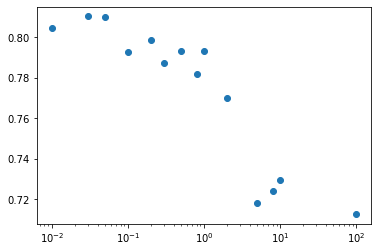

In [69]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
testCs = [0.01,0.03,.05, 0.1, 0.2, 0.3, 0.5, 0.8,1.0,2.0, 5.0, 8.0, 10.0, 100.0]
f1s = []
for C in testCs:
    clf = LinearSVC(C=C, max_iter=100000)
    clf.fit(X, targets)
    SVMpreds = clf.predict(testX)
    f1 = calculateF1(SVMpreds, testPD['target'].to_numpy())
    mf1 = calculateF1(SVMpreds, testPD['target'].to_numpy(), True)
    avgF1 = (f1 + mf1) / 2
    f1s.append(avgF1)
    print(avgF1)
    
    print(C)
#     temp = np.argpartition(clf.coef_, 10)
#     result_args = temp[:10]
    # print(vectorizer.get_feature_names()[np.argmax(clf.coef_)])
#     topwords = np.argsort(-clf.coef_[0])[:10]
#     for i in topwords:
#         print(vectorizer.get_feature_names()[i])
#     print(f1)
#     f1s.append(f1)

plt.xscale('log',basex=10) 
plt.scatter(testCs, f1s)
    

0.3458646616541353
0.01
0.3458646616541353
0.03
0.3458646616541353
0.05
0.3458646616541353
0.1
0.359218004091839
0.2
0.4271176294522598
0.3
0.6612509291706488
0.5
0.7388868509687532
0.8
0.7291604570293095
1.0
0.6953922378199835
2.0
0.6838140549112894
5.0
0.6830601092896175
8.0
0.6766228594185584
10.0
0.665073675826364
100.0


<ipython-input-413-2d503ab615ce>:25: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log',basex=10)


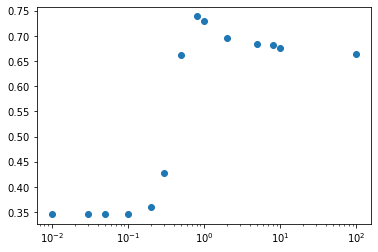

In [413]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
testCs = [0.01,0.03,.05, 0.1, 0.2, 0.3, 0.5, 0.8,1.0,2.0, 5.0, 8.0, 10.0, 100.0]
f1s = []
for C in testCs:
    clf = SVC(C=C, kernel='rbf')
    clf.fit(X, targets)
    SVMpreds = clf.predict(testX)
    f1 = calculateF1(SVMpreds, testPD['target'].to_numpy())
    mf1 = calculateF1(SVMpreds, testPD['target'].to_numpy(), True)
    avgF1 = (f1 + mf1) / 2
    f1s.append(avgF1)
    print(avgF1)
    
    print(C)
#     temp = np.argpartition(clf.coef_, 10)
#     result_args = temp[:10]
    # print(vectorizer.get_feature_names()[np.argmax(clf.coef_)])
#     topwords = np.argsort(-clf.coef_[0])[:10]
#     for i in topwords:
#         print(vectorizer.get_feature_names()[i])
#     print(f1)
#     f1s.append(f1)

plt.xscale('log',basex=10) 
plt.scatter(testCs, f1s)
    

In [4]:
import math
import pandas as pd
from sklearn import preprocessing

# features =['qual', '2gramBleu', '3gramBleu', '4gramBleu']
M =10
# train = pandas.DataFrame.from_records(train)
trainCorpus = trainPD['data'].values.astype('U')
vectorizer = CountVectorizer(min_df=M, binary=True, ngram_range=(2,3))
X = vectorizer.fit_transform(trainCorpus)
# print(vectorizer.get_feature_names())

testCorpus = testPD['data'].values.astype('U')
testVectorizer = CountVectorizer(vocabulary = vectorizer.get_feature_names(),min_df=M, binary=True)
testVector = testVectorizer.fit_transform(testCorpus)

features =['qual', '2gramBleu', '3gramBleu', '4gramBleu']

X = X.toarray()
Xfeatures = np.append(X, trainPD[features].to_numpy(), axis=1)
testX = testVector.toarray()
testXfeatures = np.append(testX, testPD[features].to_numpy(), axis=1)



def naiveBayes(bagOfWords, targets, toPredict, qual):
#   phis
#   phi disaster equals disasterRate
#   phi not disaster equals 1 - disasterRate
    humanRate = np.sum(targets) / len(targets)
    
    humanIndexes = np.argwhere(targets==1).ravel()
    machineIndexes = np.argwhere(targets==0).ravel()
    
    humanTexts = bagOfWords[humanIndexes]
    machineTexts = bagOfWords[machineIndexes]
    
    humanProbs = np.mean(humanTexts, axis =0) 
    machineProbs = np.mean(machineTexts, axis =0) 
    
    humanProbs = humanProbs.clip(1e-14, 1-1e-14)
    machineProbs = machineProbs.clip(1e-14, 1-1e-14)
    
#     Prediction
    logpyHuman = math.log(humanRate)
    logpyMachine= math.log(1 - humanRate)
    
    logpxyHuman = toPredict * np.log(humanProbs) + (1-toPredict) * np.log(1-humanProbs)
    logpxyMachine = toPredict * np.log(machineProbs) + (1-machineProbs) * np.log(1-machineProbs)

    logpyxHuman= logpxyHuman.sum(axis=1) + logpyHuman
    logpyxMachine = logpxyMachine.sum(axis=1) + logpyMachine
    
    logpyxHuman = logpyxHuman+np.average(qual)
    logpyxMachine  = logpyxMachine+(1 - np.average(qual))
    
    preds = logpyxHuman > logpyxMachine
    return preds



preds = naiveBayes(Xfeatures, targets, testXfeatures, testPD[features].to_numpy().astype(np.float) )


humanF1 = calculateF1(preds, testPD['target'].to_numpy())
machineF1 = calculateF1(preds, testPD['target'].to_numpy(), True)

# Human Score F1

avgF1 = (humanF1 + machineF1) / 2
print(avgF1)



NameError: name 'CountVectorizer' is not defined

In [271]:
wrongIndexes = []
for index, i in enumerate(preds):
    if i == 0 and testPD['target'][index]:
        print(index)
        print(testPD.iloc[index])


4
Unnamed: 0                                                              4
Unnamed: 0.1                                                            4
Unnamed: 0.1.1                                                          4
Unnamed: 0.1.1.1                                                        4
Unnamed: 0.1.1.1.1                                                      4
Unnamed: 0.1.1.1.1.1                                                    4
source                                          中国 最 大规模 的 海水 淡化 工程 落户 舟山
ref                     china's largest seawater desalination project ...
cand                    china's largest seawater desalination project ...
qual                                                               0.6014
target                                                                  1
data                    中国 最 大规模 的 海水 淡化 工程 落户 舟山 china's largest seaw...
backTrans               China's largest desalination project has been ...
2gramBleu                           

In [46]:
X = trainPD[features]
testX=testPD[features]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X, targets)

preds = neigh.predict(testX)
# KNeighborsClassifier(...)
humanF1 = calculateF1(preds, testPD['target'].to_numpy())
machineF1 = calculateF1(preds, testPD['target'].to_numpy(), True)

# Human Score F1

avgF1 = (humanF1 + machineF1) / 2
print(avgF1)

0.6896551724137931


In [290]:
testPD[['2gramBleu']] -= testPD[['2gramBleu']].min()
testPD[['2gramBleu']] /= testPD[['2gramBleu']].max()

In [292]:
print(testPD.iloc[1])
testPD[['2gramBleu', '3gramBleu', '4gramBleu']] -= testPD[['2gramBleu', '3gramBleu', '4gramBleu']].min()
testPD[['2gramBleu', '3gramBleu', '4gramBleu']] /= testPD[['2gramBleu', '3gramBleu', '4gramBleu']].max()

Unnamed: 0                                                              1
Unnamed: 0.1                                                            1
Unnamed: 0.1.1                                                          1
Unnamed: 0.1.1.1                                                        1
Unnamed: 0.1.1.1.1                                                      1
Unnamed: 0.1.1.1.1.1                                                    1
source                  在 国际 政治 舞台上 , 中国 是 一个 负责任 的 国家 , 对 维护 世界和平 与 稳...
ref                     in the international political arena , china i...
cand                    in the international political arena , china i...
qual                                                              0.63272
target                                                                  1
data                    在 国际 政治 舞台上 , 中国 是 一个 负责任 的 国家 , 对 维护 世界和平 与 稳...
backTrans               In the international political arena, China is...
2gramBleu                             

1.0


In [307]:
print(trainPD.iloc[0])

Unnamed: 0                                                        0
Unnamed: 0.1                                                      0
Unnamed: 0.1.1                                                    0
source                              巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂
ref               bahraini princess marries us soldier , astonis...
cand              bahraini princess marries a u.s. soldier ; ast...
qual                                                         0.3125
target                                                            1
data              巴林 公主 下 嫁 美 大兵 惊 世 婚姻 五 年 宣告 破裂 bahraini princ...
backTrans         Bahrain princess marries an American soldier; ...
backTransGram1                                             0.460022
backTransGram2                                             0.339749
backTransGram3                                             0.222977
backTransGram4                                           3.8399e-78
2gramBleu                                       

In [3]:
trainPD = pd.read_csv("../data/trainWithAllBackTrans.csv")
testPD = pd.read_csv("../data/testWithAllBackTrans.csv")

In [403]:
trainPD['qual']



0      0.3125
1      0.6531
2      0.3784
3      0.3646
4      0.7778
        ...  
579    0.3705
580    0.6944
581    0.3267
582    0.3858
583    0.6332
Name: qual, Length: 584, dtype: float64

(array([216., 106.,  99.,  68.,  39.,  20.,  18.,  10.,   5.,   3.]),
 array([0.29628158, 0.39628158, 0.49628158, 0.59628158, 0.69628158,
        0.79628158, 0.89628158, 0.99628158, 1.09628158, 1.19628158,
        1.29628158]),
 <BarContainer object of 10 artists>)

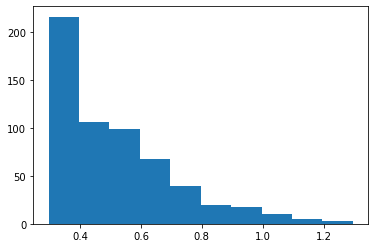

In [411]:
trainPD['qual']=0.5 + (trainPD['qual']-trainPD['qual'].mean())
trainPD['2gramBleu']=0.5 + (trainPD['2gramBleu']-trainPD['2gramBleu'].mean())
trainPD['3gramBleu']=0.5 + (trainPD['3gramBleu']-trainPD['3gramBleu'].mean())
trainPD['4gramBleu']=0.5 + (trainPD['4gramBleu']-trainPD['4gramBleu'].mean())


plt.hist(trainPD['4gramBleu'])

In [327]:
trainPD['qual'].std()

1.0000000000000002

In [330]:
trainPD.iloc[1]

Unnamed: 0                                                        1
Unnamed: 0.1                                                      1
Unnamed: 0.1.1                                                    1
source            巴林 公主 梅 丽 安 ・ 哈 里 发 下 嫁 美国 陆 战 队 大兵 强 生 , 曾 获 ...
ref               the star-crossed marriage between bahraini pri...
cand              u.s. television stations had once feted the ma...
qual                                                       0.552314
target                                                            1
data              巴林 公主 梅 丽 安 ・ 哈 里 发 下 嫁 美国 陆 战 队 大兵 强 生 , 曾 获 ...
backTrans         At one point, U.S. television supported the ma...
backTransGram1                                             0.338573
backTransGram2                                             0.266201
backTransGram3                                             0.206782
backTransGram4                                             0.158497
2gramBleu                                       